In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from math import *
from scipy import special

In [28]:
data1 = pd.read_excel('cyexcel.xlsx',sheet_name = 'Sheet1')
data2 = pd.read_excel('cyexcel.xlsx',sheet_name = 'Sheet2')
data1 = data1.set_index('Time')
data2 = data2.set_index('Time')
df = data1.join(data2,how = 'left')

In [29]:
df

,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg
Time,,,,,,,,
0,2740,NaN,120.0,NaN,650,1.404,650,0.00093
1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098
2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107
3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117
4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128
5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139
6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150
7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160
8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170


## Global Variables

In [4]:
k = 200
phi = 0.25
mew = 0.55
c = 7 * 10**(-6)
ro = 9200
h = 100
Bw = 1.0
cf = 4 *10**(-6)
cw = 3 * 10**(-6)
f = 140/360

N = 312 * 10**6
Swc = 0.05
U = 1.119 *f* phi *h*c*ro**2

In [5]:
def tde(t):
    k = 200
    phi = 0.25
    mew = 0.55
    c = 7 * 10**(-6)
    ro = 9200
    
    return (2.309*k*t)/(phi*mew*c*ro**2)

In [6]:
def csch(rD):
    return 2/((e**rD)-(e**-rD))

## Finite case

In [7]:
def finite_qd(tde,rD): 
    tD = tde
    #for alpha 1
    b0 = float(-0.00222107)
    b1 = float(-0.627638)
    b2 = float(6.277915)
    b3 = float(-2.734405)
    b4 = float(1.2708)
    b5 = float(-1.100417)
    a1 = float(b0+b1*csch(rD)+b2*(rD**b3)+b4*(rD**b5))

    
    #for alpha 2
    b0 = float(-0.00796608)
    b1 = float(-1.85408)
    b2 = float(18.71169)
    b3 = float(-2.758326)
    b4 = float(4.829162)
    b5 = float(-1.009021)
    a2 = float(b0+b1*csch(rD) +b2*(rD**b3)+b4*(rD**b5))

    
    #Calculate qD
    bes_0_1 = float(special.j0(a1))
    bes_1_1 = float(special.j1(a1*rD))
    bes_0_2 = float(special.j0(a2))
    bes_1_2 = float(special.j1(a2*rD))
    qD1 = float(((rD**2)-1)/2)
    qD2 = float((2*exp(((-a1**2)*tD)) *bes_1_1**2) / ((a1**2)*(bes_0_1**2 - bes_1_1**2)))
    qD3 = float((2*exp(((-a2**2)*tD)) *(bes_1_2)**2) / ( (a1**2)*(bes_0_2**2- bes_1_2**2)))
    qD = qD1 - qD2 - qD3
    
    return qD  

In [8]:
'''rD = 10
b0 = -0.00222107
b1 = -0.627638
b2 = 6.277915
b3 = -2.734405
b4 = 1.2708
b5 = -1.00417
a1 = b0+b1*csch(rD)+b2*(rD**b3)+b4*(rD**b5)
finite_qd(20,10)'''


'rD = 10\nb0 = -0.00222107\nb1 = -0.627638\nb2 = 6.277915\nb3 = -2.734405\nb4 = 1.2708\nb5 = -1.00417\na1 = b0+b1*csch(rD)+b2*(rD**b3)+b4*(rD**b5)\nfinite_qd(20,10)'

In [9]:
#finite_qd(20,10)

# Infinte Case

In [10]:
def infinite_qde(tD):
    qD = None
    if tD < 200 and 0.01<tD:
        b0 = 1.129552
        b1 = 1.160436
        b2 = 0.2642821
        b3 = 0.01131791
        b4 = 0.5900113
        b5 = 0.04589742
        b6 = 1.00
        b7 = 0.5002034
        b8 = 1.500
        b9 = 1.979139

        qD = (b0*(tD**b7)+b1*(tD)+b2*(tD**b8)+b3*(tD**b9))/(b4*(tD**b7)+b5*(tD)+b6)

    elif tD< 0.01:
        qD = (2 * tD**0.5)/math.pi ** 0.5
        
        
    #for 200-<tD<2.0*10^12
    elif tD< 2*10**12 and tD>= 200 :
        b0 = 4.39880
        b1 = 0.43693
        b2 = -4.16078
        b3 = 0.090
        qD = 10**(b0+b1* log(tD)+b2*((log(tD))**b3) )
                  
    return qD

## Tcross

In [11]:
def tcross(rD):
    b0 = -1.767
    b1 = -0.606
    b2 = 0.12368
    b3 = 3.02
    b4 = 2.25
    b5 = 0.5
    ans = b0+b1*rD+b2*((rD)**b4)+b3*(math.log(rD))**b5
    return ans

# Step 3

In [12]:
def step3(tD,rD):
    tcros = tcross(rD)
    if tD < tcros :
        ans = infinite_qde(tD)
    else :
        ans = finite_qd(tD,rD)
        
    return ans

In [13]:
def step4(tD,rD):
    tcros = tcross(rD)
    if tD < tcros:
        ans = 'infinite_qde(tD)'
    else :
        ans = 'finite_qd(tD,rD)'
        
    return ans

In [15]:
def wde(df):
    for i in range(1,len(df)):
        wde = 0
        for j in range(i):
            wde += (df.loc[j,'delta p'] * df.loc[i-j,'wd'])
        df.loc[i,'We'] = U * wde
    return df

In [16]:
def accessories(df):    
    df['F'] = df['Np']*(df['Bo']+(df['Rp']-df['Rs'])*df['Bg'])
    df['Eo'] = (df['Bo']-df.loc[0,'Bo'])+(df.loc[0,'Rs'] - df['Rs'])*df['Bg']
    df['f\eo'] = df['F']/df['Eo']
    df['wd/eo'] = df['We']/df['Eo']
    return df

In [17]:
df['tde'] = df['Time'].apply(tde)


## Input rD value (trial)
Use the plot below to confirm the matching, if there is no match try another value of rD

In [18]:
rD = float(input("please enter your rD value: "))

please enter your rD value: 5


In [19]:
df['wd'] = df['tde'].apply(lambda x : step3(x,rD))

In [20]:
df['method'] = df['tde'].apply(lambda x : step4(x,rD))

In [21]:
df

,Time,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg,tde,wd,method
0,0,2740,NaN,120.0,NaN,650,1.404,650,0.00093,0.000000,0.000000,infinite_qde(tD)
1,1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098,5.668622,4.895063,"finite_qd(tD,rD)"
2,2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107,11.337245,7.484160,"finite_qd(tD,rD)"
3,3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117,17.005867,9.128025,"finite_qd(tD,rD)"
4,4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128,22.674490,10.173486,"finite_qd(tD,rD)"
5,5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139,28.343112,10.838376,"finite_qd(tD,rD)"
6,6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150,34.011735,11.261232,"finite_qd(tD,rD)"
7,7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160,39.680357,11.530160,"finite_qd(tD,rD)"
8,8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170,45.348980,11.701192,"finite_qd(tD,rD)"
9,9,1480,1507.0,47.0,74.54,1145,1.276,381,0.00176,51.017602,11.809964,"finite_qd(tD,rD)"


In [22]:
df = wde(df)

In [23]:
df

,Time,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg,tde,wd,method,We
0,0,2740,NaN,120.0,NaN,650,1.404,650,0.00093,0.000000,0.000000,infinite_qde(tD),NaN
1,1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098,5.668622,4.895063,"finite_qd(tD,rD)",3.786247e+06
2,2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107,11.337245,7.484160,"finite_qd(tD,rD)",1.288808e+07
3,3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117,17.005867,9.128025,"finite_qd(tD,rD)",2.409870e+07
4,4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128,22.674490,10.173486,"finite_qd(tD,rD)",3.592621e+07
5,5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139,28.343112,10.838376,"finite_qd(tD,rD)",4.747713e+07
6,6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150,34.011735,11.261232,"finite_qd(tD,rD)",5.820799e+07
7,7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160,39.680357,11.530160,"finite_qd(tD,rD)",6.792748e+07
8,8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170,45.348980,11.701192,"finite_qd(tD,rD)",7.640238e+07
9,9,1480,1507.0,47.0,74.54,1145,1.276,381,0.00176,51.017602,11.809964,"finite_qd(tD,rD)",8.352596e+07


In [24]:
df = accessories(df)

In [25]:
df

,Time,Pressure OWC(psia),Plateau pressure (psia),delta p,Np,Rp,Bo,Rs,Bg,tde,wd,method,We,F,Eo,f\eo,wd/eo
0,0,2740,NaN,120.0,NaN,650,1.404,650,0.00093,0.000000,0.000000,infinite_qde(tD),NaN,NaN,0.00000,NaN,NaN
1,1,2500,2620.0,225.0,7.88,760,1.374,592,0.00098,5.668622,4.895063,"finite_qd(tD,rD)",3.786247e+06,12.124483,0.02684,451.731863,1.410673e+08
2,2,2290,2395.0,196.0,18.42,845,1.349,545,0.00107,11.337245,7.484160,"finite_qd(tD,rD)",1.288808e+07,30.761400,0.05735,536.380122,2.247268e+08
3,3,2109,2199.0,170.0,29.15,920,1.329,507,0.00117,17.005867,9.128025,"finite_qd(tD,rD)",2.409870e+07,52.825921,0.09231,572.266510,2.610627e+08
4,4,1949,2029.0,146.0,40.69,975,1.316,471,0.00128,22.674490,10.173486,"finite_qd(tD,rD)",3.592621e+07,79.797973,0.14112,565.461825,2.545791e+08
5,5,1818,1883.0,123.0,50.14,1025,1.303,442,0.00139,28.343112,10.838376,"finite_qd(tD,rD)",4.747713e+07,105.964372,0.18812,563.280735,2.523768e+08
6,6,1702,1760.0,105.0,58.42,1065,1.294,418,0.00150,34.011735,11.261232,"finite_qd(tD,rD)",5.820799e+07,132.292090,0.23800,555.849118,2.445714e+08
7,7,1608,1655.0,84.0,65.39,1095,1.287,398,0.00160,39.680357,11.530160,"finite_qd(tD,rD)",6.792748e+07,157.079858,0.28620,548.846464,2.373427e+08
8,8,1635,1571.0,64.0,70.74,1120,1.280,383,0.00170,45.348980,11.701192,"finite_qd(tD,rD)",7.640238e+07,179.177346,0.32990,543.126238,2.315925e+08
9,9,1480,1507.0,47.0,74.54,1145,1.276,381,0.00176,51.017602,11.809964,"finite_qd(tD,rD)",8.352596e+07,195.342506,0.34544,565.488958,2.417958e+08


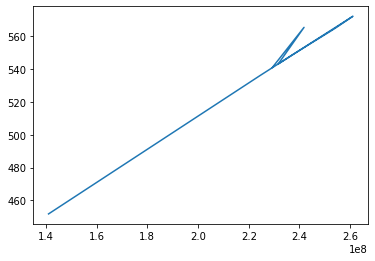

In [26]:
plt.plot(df['wd/eo'],df['f\eo'])

In [27]:
tcross(5)

3.657899879898163